
Import libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read dataset


In [2]:
df_raw = pd.read_csv('/content/laptop_price_predict/laptopPrice.csv')

Make dataset copy


In [3]:
df = df_raw.copy()

Initial dataset exploration


In [4]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [6]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


Checking what features affect the average price of a laptop


In [8]:
df['brand'].value_counts()

ASUS      249
DELL      151
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      28
Avita      14
Name: brand, dtype: int64

In [25]:
def mean_price_for_string(column_name, feature):
  return df[df[column_name] == feature]['Price'].mean()

Text(0.5, 1.0, 'The average price of laptops of a given brand')

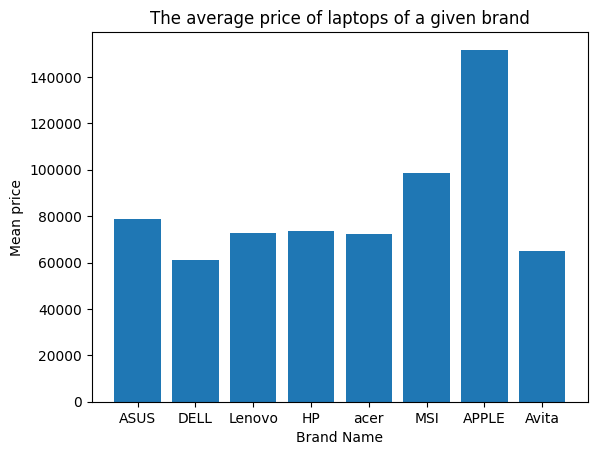

In [27]:
asus_brand_mean_price = mean_price_for_string('brand', 'ASUS')
dell_brand_mean_price = mean_price_for_string('brand', 'DELL')
lenovo_brand_mean_price = mean_price_for_string('brand', 'Lenovo')
hp_brand_mean_price = mean_price_for_string('brand', 'HP')
acer_brand_mean_price = mean_price_for_string('brand', 'acer')
msi_brand_mean_price = mean_price_for_string('brand', 'MSI')
apple_brand_mean_price = mean_price_for_string('brand', 'APPLE')
avita_brand_mean_price = mean_price_for_string('brand', 'Avita')

brands = ['ASUS', 'DELL', 'Lenovo', 'HP', 'acer', 'MSI', 'APPLE', 'Avita']
mean_prices_brands = [asus_brand_mean_price, dell_brand_mean_price, lenovo_brand_mean_price, hp_brand_mean_price, acer_brand_mean_price, msi_brand_mean_price, apple_brand_mean_price,
                      avita_brand_mean_price]

plt.bar(brands, mean_prices_brands)
plt.xlabel('Brand Name')
plt.ylabel('Mean price')
plt.title('The average price of laptops of a given brand')

In [28]:
df['processor_brand'].value_counts()

Intel    610
AMD      189
M1        24
Name: processor_brand, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given processor brand')

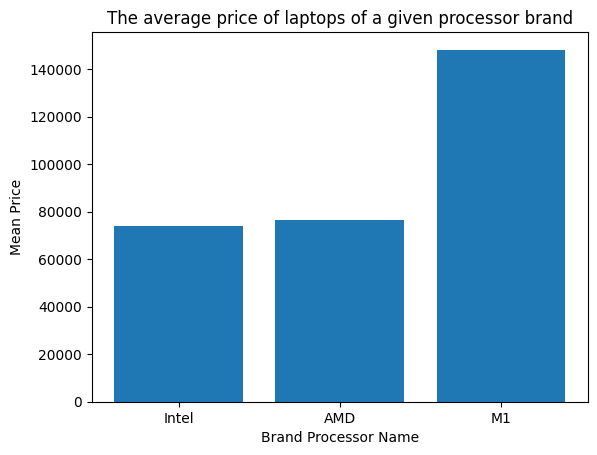

In [29]:
intel_processor_brand_mean_price = mean_price_for_string('processor_brand', 'Intel')
amd_processor_brand_mean_price = mean_price_for_string('processor_brand', 'AMD')
m1_processor_brand_mean_price = mean_price_for_string('processor_brand', 'M1')

processor_brands = ['Intel', 'AMD', 'M1']
processor_brands_mean_prices = [intel_processor_brand_mean_price, amd_processor_brand_mean_price, m1_processor_brand_mean_price]

plt.bar(processor_brands, processor_brands_mean_prices)
plt.xlabel('Brand Processor Name')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given processor brand')

In [30]:
df['processor_name'].value_counts()

Core i5         290
Core i3         164
Core i7         110
Ryzen 5          82
Ryzen 7          56
Ryzen 3          26
Ryzen 9          26
Celeron Dual     24
M1               24
Pentium Quad     13
Core i9           8
Name: processor_name, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Core i5'),
  Text(1, 0, 'Core i3'),
  Text(2, 0, 'Core i7'),
  Text(3, 0, 'Ryzen 5'),
  Text(4, 0, 'Ryzen 7'),
  Text(5, 0, 'Ryzen 3'),
  Text(6, 0, 'Ryzen 9'),
  Text(7, 0, 'Celeron Dual'),
  Text(8, 0, 'M1'),
  Text(9, 0, 'Pentium Quad'),
  Text(10, 0, 'Core i9')])

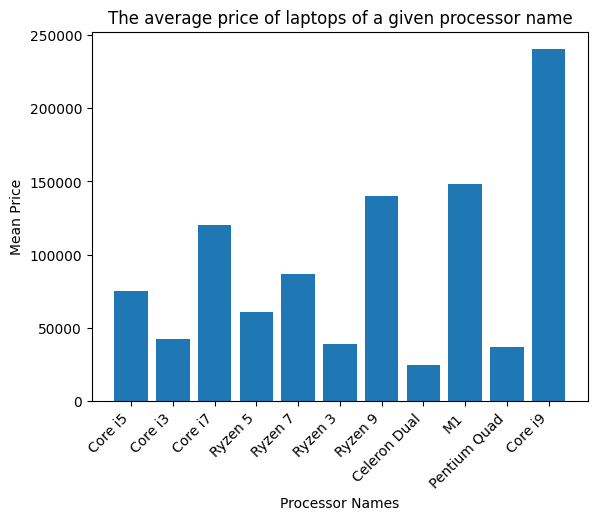

In [32]:
processors = ['Core i5', 'Core i3', 'Core i7', 'Ryzen 5', 'Ryzen 7', 'Ryzen 3', 'Ryzen 9', 'Celeron Dual', 'M1', 'Pentium Quad', 'Core i9']
processors_mean_prices = []

for processor in processors:
  mean_price = mean_price_for_string('processor_name', processor)
  processors_mean_prices.append(mean_price)


plt.bar(processors, processors_mean_prices)
plt.xlabel('Processor Names')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given processor name')
plt.xticks(rotation=45, ha='right')


In [33]:
df['processor_gnrtn'].value_counts()

11th             334
Not Available    225
10th             204
8th               41
7th                9
9th                6
12th               3
4th                1
Name: processor_gnrtn, dtype: int64

In [34]:
df['ram_gb'].value_counts()

8 GB     418
4 GB     226
16 GB    177
32 GB      2
Name: ram_gb, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given ram_gb type')

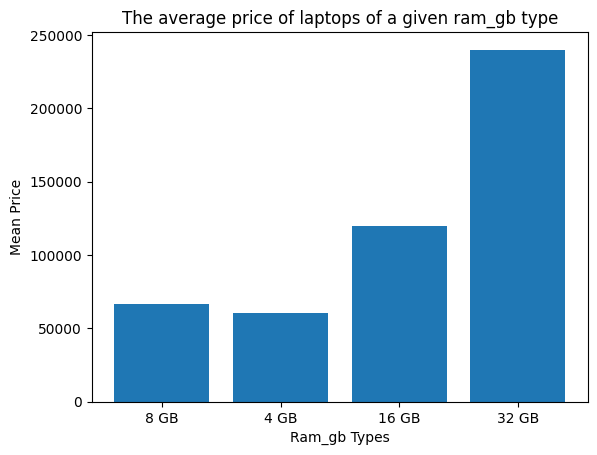

In [36]:
ram_gb_types = ['8 GB', '4 GB', '16 GB', '32 GB']
ram_gb_mean_prices = []

for ram_gb_type in ram_gb_types:
  mean_price = mean_price_for_string('ram_gb', ram_gb_type)
  ram_gb_mean_prices.append(mean_price)

plt.bar(ram_gb_types, ram_gb_mean_prices)
plt.xlabel('Ram_gb Types')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given ram_gb type')

In [37]:
df['ram_type'].value_counts()

DDR4       709
LPDDR4X     58
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: ram_type, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given ram type')

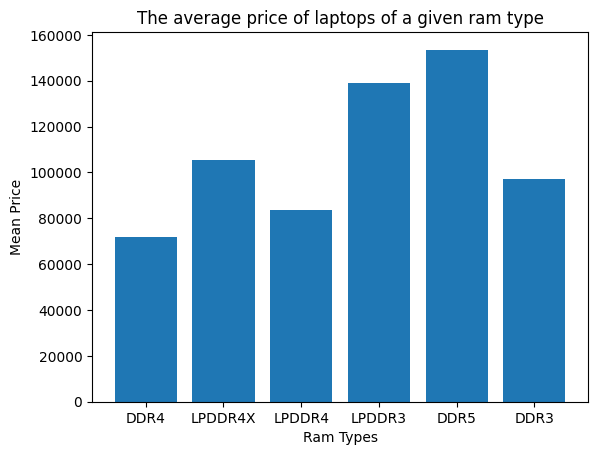

In [40]:
ram_types = ['DDR4', 'LPDDR4X', 'LPDDR4', 'LPDDR3', 'DDR5', 'DDR3']
ram_types_mean_prices = []

for ram_type in ram_types:
  mean_price = mean_price_for_string('ram_type', ram_type)
  ram_types_mean_prices.append(mean_price)

plt.bar(ram_types, ram_types_mean_prices)
plt.xlabel('Ram Types')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given ram type')

In [41]:
df['ssd'].value_counts()

512 GB     398
256 GB     184
0 GB       124
1024 GB    111
128 GB       3
2048 GB      2
3072 GB      1
Name: ssd, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given ssd memory')

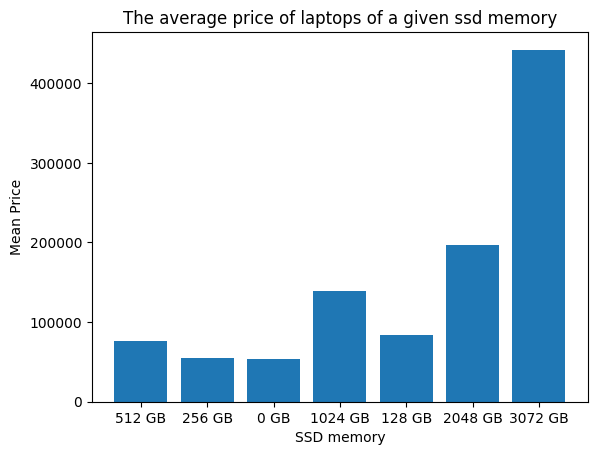

In [42]:
ssd_memory = ['512 GB', '256 GB', '0 GB', '1024 GB', '128 GB', '2048 GB', '3072 GB']
ssd_memory_mean_price = []


for ssd in ssd_memory:
  mean_price = mean_price_for_string('ssd', ssd)
  ssd_memory_mean_price.append(mean_price)


plt.bar(ssd_memory, ssd_memory_mean_price)
plt.xlabel('SSD memory')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given ssd memory')

In [44]:
df['hdd'].value_counts()

0 GB       621
1024 GB    160
512 GB      41
2048 GB      1
Name: hdd, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given hdd memory')

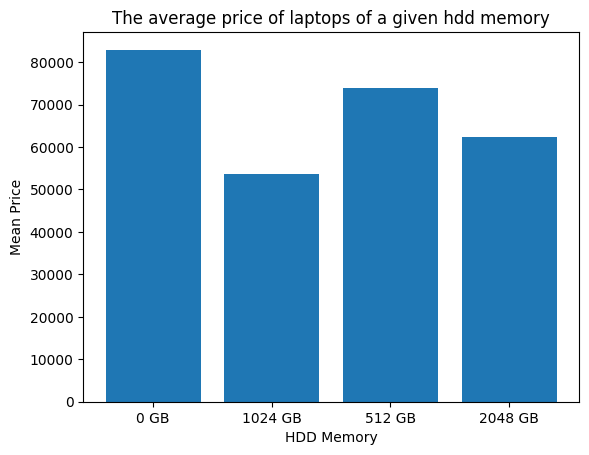

In [45]:
hdd_memory = ['0 GB', '1024 GB', '512 GB', '2048 GB']
hdd_memory_mean_price = []

for hdd in hdd_memory:
  mean_price = mean_price_for_string('hdd', hdd)
  hdd_memory_mean_price.append(mean_price)

plt.bar(hdd_memory, hdd_memory_mean_price)
plt.xlabel('HDD Memory')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given hdd memory')

In [46]:
df['os'].value_counts()

Windows    779
Mac         28
DOS         16
Name: os, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given Operating System')

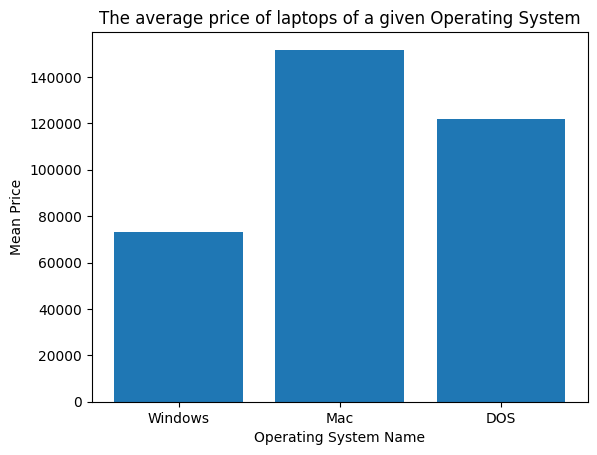

In [47]:
os_types = ['Windows', 'Mac', 'DOS']
os_mean_prices = []

for os in os_types:
  mean_price = mean_price_for_string('os', os)
  os_mean_prices.append(mean_price)

plt.bar(os_types, os_mean_prices)
plt.xlabel('Operating System Name')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given Operating System')


In [49]:
df['os_bit'].value_counts()

64-bit    714
32-bit    109
Name: os_bit, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given Operating Systems Bits')

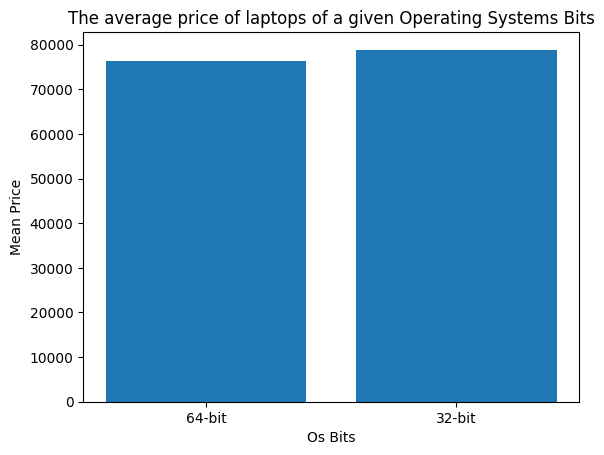

In [52]:
os_bit_type = ['64-bit', '32-bit']
os_bit_mean_price = []


for os_bit in os_bit_type:
  mean_price = mean_price_for_string('os_bit', os_bit)
  os_bit_mean_price.append(mean_price)

plt.bar(os_bit_type, os_bit_mean_price)
plt.xlabel('Os Bits')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given Operating Systems Bits')



In [54]:
df['graphic_card_gb'].value_counts()

0 GB    577
4 GB    128
2 GB     67
6 GB     37
8 GB     14
Name: graphic_card_gb, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given Graphic Cards GB')

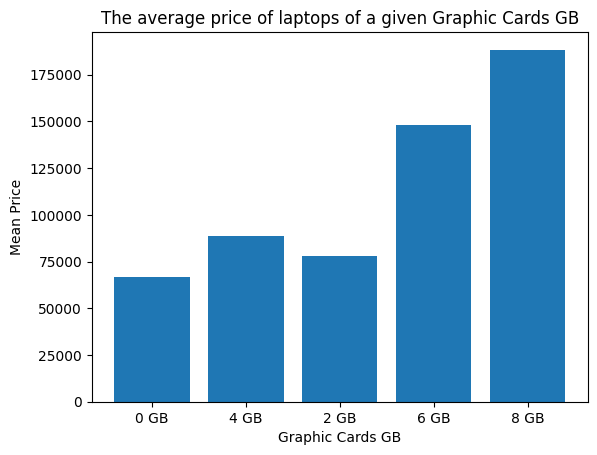

In [56]:
graphic_cards_gb = ['0 GB', '4 GB', '2 GB', '6 GB', '8 GB']
graphic_cards_mean_price = []

for graphic_card_gb in graphic_cards_gb:
  mean_price = mean_price_for_string('graphic_card_gb', graphic_card_gb)
  graphic_cards_mean_price.append(mean_price)

plt.bar(graphic_cards_gb, graphic_cards_mean_price)
plt.xlabel('Graphic Cards GB')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given Graphic Cards GB')

In [57]:
df['weight'].value_counts()

Casual        520
ThinNlight    264
Gaming         39
Name: weight, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given Weights')

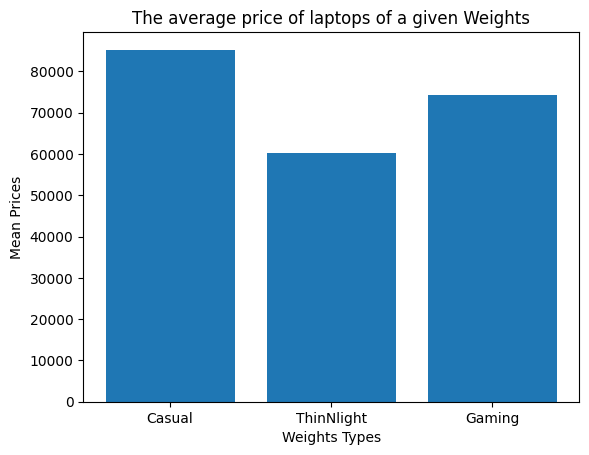

In [58]:
weights_types = ['Casual', 'ThinNlight', 'Gaming']
weights_mean_price = []

for weight in weights_types:
  mean_price = mean_price_for_string('weight', weight)
  weights_mean_price.append(mean_price)


plt.bar(weights_types, weights_mean_price)
plt.xlabel('Weights Types')
plt.ylabel('Mean Prices')
plt.title('The average price of laptops of a given Weights')

In [59]:
df['warranty'].value_counts()

1 year         509
No warranty    278
2 years         23
3 years         13
Name: warranty, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given Warranty')

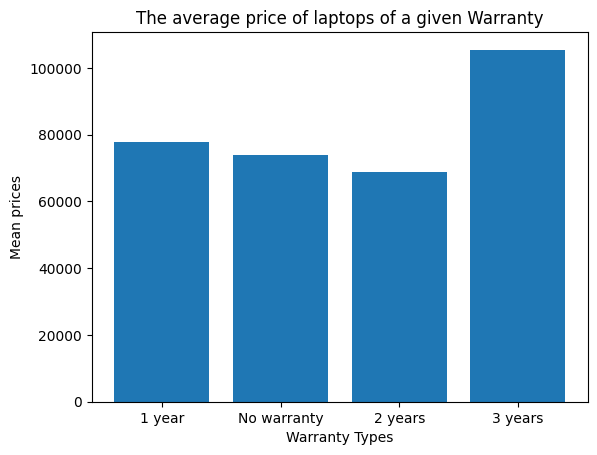

In [60]:
warranty_types = ['1 year', 'No warranty', '2 years', '3 years']
warranty_mean_prices = []


for warranty in warranty_types:
  mean_price = mean_price_for_string('warranty', warranty)
  warranty_mean_prices.append(mean_price)

plt.bar(warranty_types, warranty_mean_prices)
plt.xlabel('Warranty Types')
plt.ylabel('Mean prices')
plt.title('The average price of laptops of a given Warranty')

In [61]:
df['Touchscreen'].value_counts()

No     726
Yes     97
Name: Touchscreen, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given Touchscreen')

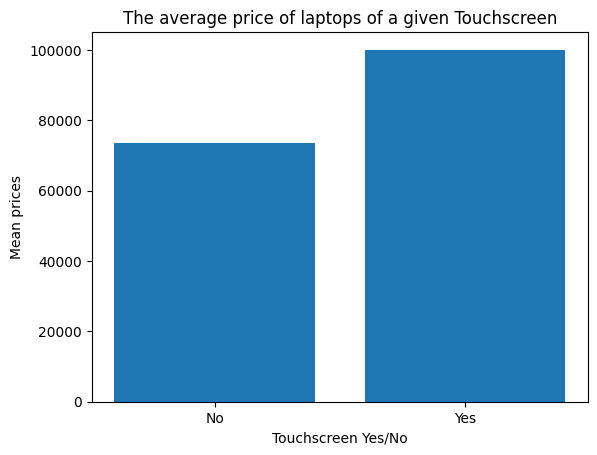

In [63]:
if_touchscreen = ['No', 'Yes']
touchscreen_mean_price = []

for touchscreen in if_touchscreen:
  mean_price = mean_price_for_string('Touchscreen', touchscreen)
  touchscreen_mean_price.append(mean_price)

plt.bar(if_touchscreen, touchscreen_mean_price)
plt.xlabel('Touchscreen Yes/No')
plt.ylabel('Mean prices')
plt.title('The average price of laptops of a given Touchscreen')

In [64]:
df['msoffice'].value_counts()


No     542
Yes    281
Name: msoffice, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given msoffice')

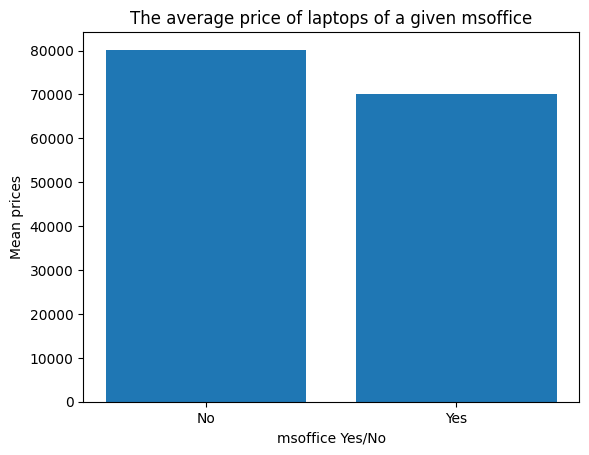

In [65]:
if_msoffice = ['No', 'Yes']
msoffice_mean_price = []

for msoffice in if_msoffice:
  mean_price = mean_price_for_string('msoffice', msoffice)
  msoffice_mean_price.append(mean_price)

plt.bar(if_msoffice, msoffice_mean_price)
plt.xlabel('msoffice Yes/No')
plt.ylabel('Mean prices')
plt.title('The average price of laptops of a given msoffice')

In [66]:
df['rating'].value_counts()

4 stars    444
3 stars    352
5 stars     16
2 stars      9
1 star       2
Name: rating, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given rating')

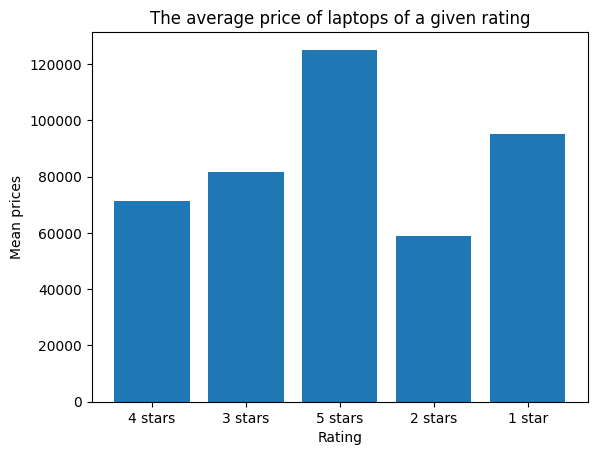

In [68]:
ratings = ['4 stars', '3 stars', '5 stars', '2 stars', '1 star']
ratings_mean_prices = []

for rating in ratings:
  mean_price = mean_price_for_string('rating', rating)
  ratings_mean_prices.append(mean_price)

plt.bar(ratings, ratings_mean_prices)
plt.xlabel('Rating')
plt.ylabel('Mean prices')
plt.title('The average price of laptops of a given rating')

In [69]:
#df['Number of Ratings'].value_counts()

0       256
3        23
4        18
17       18
7        13
       ... 
216       1
262       1
1753      1
1681      1
204       1
Name: Number of Ratings, Length: 282, dtype: int64